In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Source Sans Pro']})
rc('text', usetex=True)
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

In [3]:
import math
import numpy as np
from scipy.fft import fft2

from package.analysis import ft
from package.helpers import test_lens, test_physical_lens
from package.plots import plot

/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [4]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

In [5]:
one = np.load(os.path.join(array_dir, 'detector_1.npy'))
three = np.load(os.path.join(array_dir, 'detector_3.npy'))
five = np.load(os.path.join(array_dir, 'detector_5.npy'))
seven = np.load(os.path.join(array_dir, 'detector_7.npy'))
nine = np.load(os.path.join(array_dir, 'detector_9.npy'))

In [6]:
img = nine

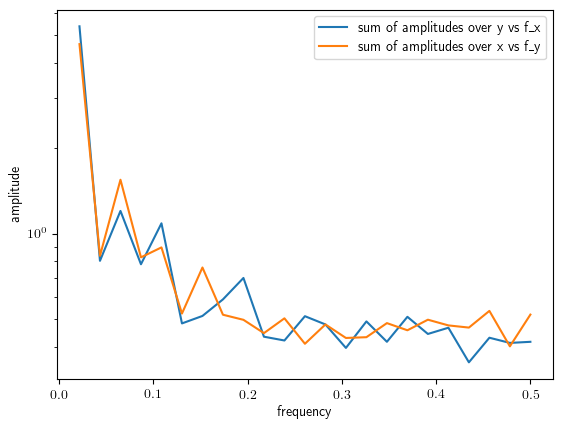

In [7]:
# Fourier Transform along the first axis

# Round up the size along this axis to an even number
n = int(math.ceil(img.shape[0] / 2.) * 2 )

# We use rfft since we are processing real values
a = np.fft.rfft(img,n, axis=0)

# Sum power along the second axis
a = a.real*a.real + a.imag*a.imag
a = a.sum(axis=1)/a.shape[1]

# Generate a list of frequencies
f = np.fft.rfftfreq(n)

# Graph it
plt.plot(f[1:],a[1:], label = 'sum of amplitudes over y vs f_x')

# Fourier Transform along the second axis

# Same steps as above
n = int( math.ceil(img.shape[1] / 2.) * 2 )

a = np.fft.rfft(img,n,axis=1)

a = a.real*a.real + a.imag*a.imag
a = a.sum(axis=0)/a.shape[0]

f = np.fft.rfftfreq(n)

plt.plot(f[1:],a[1:],  label ='sum of amplitudes over x vs f_y')

plt.ylabel( 'amplitude' )
plt.xlabel( 'frequency' )
plt.yscale( 'log' )

plt.legend()

# plt.savefig( 'test_rfft.png' )
plt.show()